## Graphing the Birthday Paradox

In [41]:
import pandas as pd
import numpy as np
from scipy.special import comb, perm
import matplotlib.pyplot as plt

In [8]:
def same_birthday(num_people):
    
    #number of possible pairs of people
    num_pairs = comb(num_people, 2)
    
    # what is the chance that the two people we chose have different birthdays? 
    # Assumption: All Birthdays are independent!
    pair_diff_prob = 364/365
    
    # what is the probability that ANY two people you choose will have different birthdays
    all_diff_prob = pair_diff_prob**num_pairs
    
    # what is the probability that at least one pair of people you choose will have the same birthday
    return (1 - all_diff_prob)
    

In [9]:
# Checking function with an example of 23 people
same_birthday(23)

0.50047715403658066

In [53]:
# List of the number of people
num_people_list = range(2, 150)

# List of probabilities that at least one pair selected from N people (N picked from num_people_list) 
# have the same birthday
same_birthday_prob = []

for num_people in num_people_list:
    same_birthday_prob.append(same_birthday(num_people))

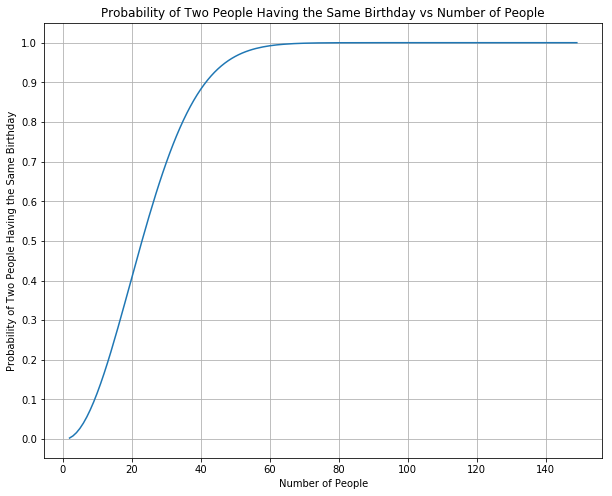

In [54]:
# Graphing the result
plt.figure(figsize=(10, 8))
plt.title("Probability of Two People Having the Same Birthday vs Number of People")
plt.xlabel("Number of People")
plt.ylabel("Probability of Two People Having the Same Birthday")
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid()
plt.plot(num_people_list, same_birthday_prob)
plt.show()

### Graphing Rate of Change of Probabilities in the Birthday Paradox

In [55]:
# Compute differences between successive probabilities using list comprehension
diff_in_birthday_prob = [same_birthday_prob[i + 1] - same_birthday_prob[i] for i in range(len(same_birthday_prob)-1)]


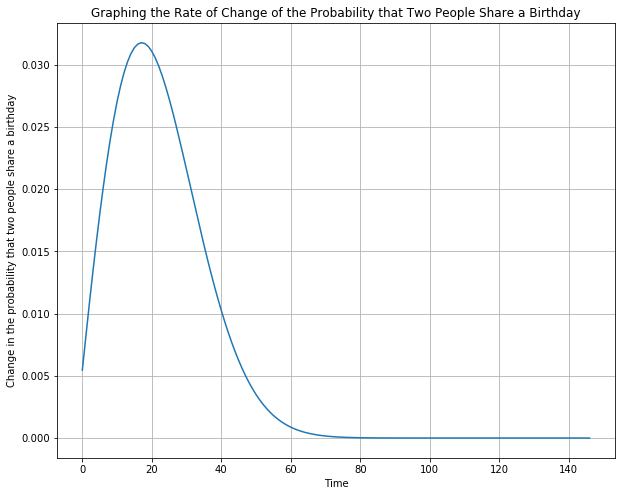

In [56]:
# Plot the change
plt.figure(figsize=(10, 8))
plt.title("Graphing the Rate of Change of the Probability that Two People Share a Birthday")
plt.xlabel("Time")
plt.ylabel("Change in the probability that two people share a birthday")
# plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid()
plt.plot(range(len(diff_in_birthday_prob)), diff_in_birthday_prob)
plt.show()

## A More Realistic Version of The Birthday Paradox

- Remove the assumption that birthdays are independent, hence, multiple people can share a birthday now
- Use formula from collisions: https://twitter.com/3blue1brown/status/1192570997427191809?s=20


In [57]:
def same_birthday_actual(num_people):
    
    # Using Taylor Series Approximation, because 365! will lead to an overflow
    return (1 - np.exp(-(num_people**2)/(2*365)))



In [58]:
# Checking function with an example of 23 people
same_birthday_actual(23)

0.51550953806151678

In [59]:
# List of the number of people
num_people_list = range(2, 200)

# List of probabilities that at least one pair selected from N people (N picked from num_people_list) 
# have the same birthday
same_birthday_actual_prob = []

for num_people in num_people_list:
    same_birthday_actual_prob.append(same_birthday_actual(num_people))

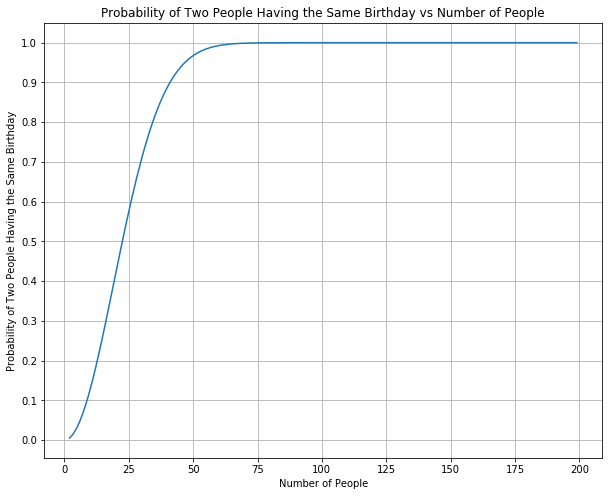

In [60]:
# Graphing the result
plt.figure(figsize=(10, 8))
plt.title("Probability of Two People Having the Same Birthday vs Number of People")
plt.xlabel("Number of People")
plt.ylabel("Probability of Two People Having the Same Birthday")
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid()
plt.plot(num_people_list, same_birthday_actual_prob)
plt.show()